# 🌎 Análisis Geográfico - Consumer Complaint Database (CFPB)

Análisis de quejas por estado con visualización de mapa coroplético

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Usar new_df ya preparado
new_df = pd.read_csv('new_dataset.csv')
new_df['state'] = new_df['state']
print(f"Dataset: {len(new_df):,} registros")

Dataset: 8,509,423 registros


## 1. Análisis por Estado

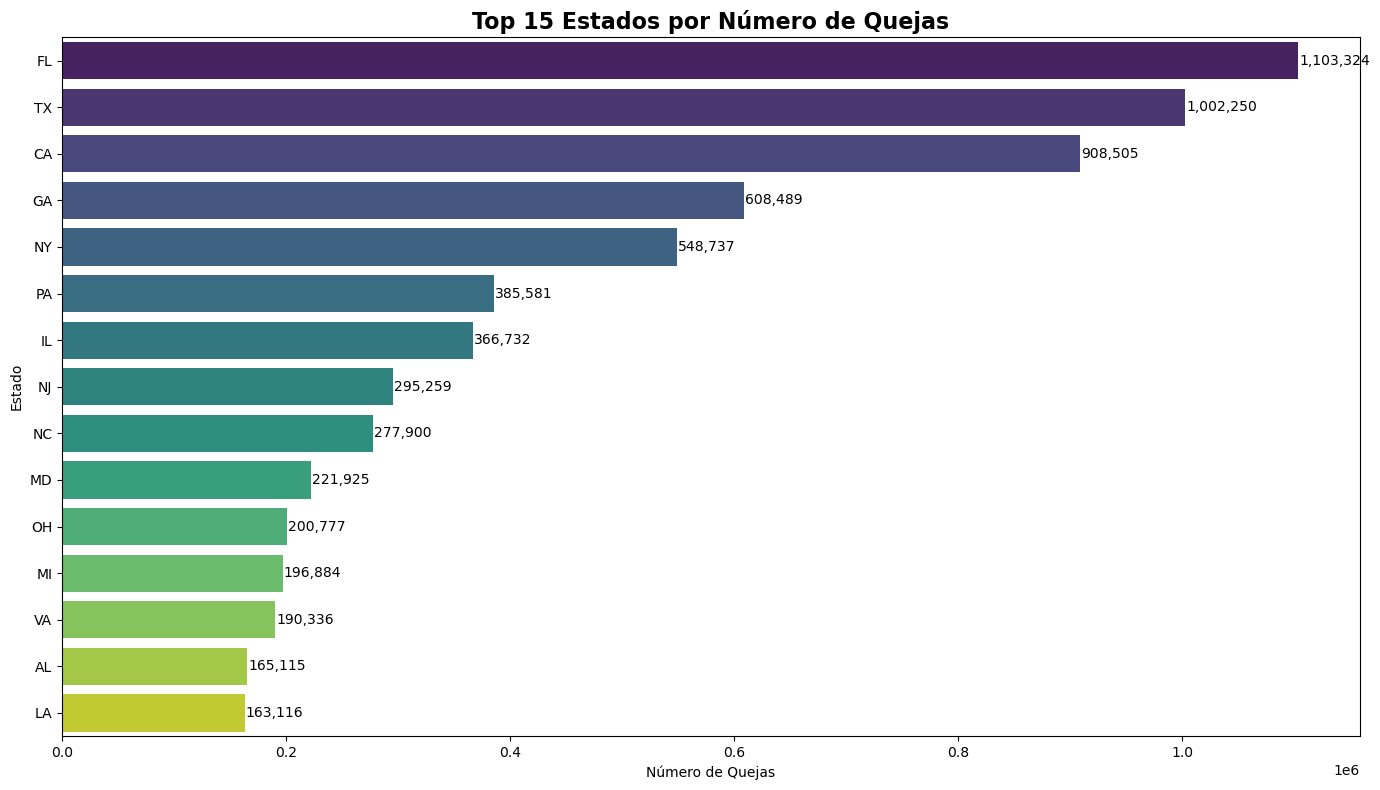

Estados únicos: 63
Total de quejas: 8,456,711


In [3]:
# Agrupar quejas por estado
state_counts = new_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'num_quejas']

# Top 15 estados
top_states = state_counts.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_states, x='num_quejas', y='state', palette='viridis')
plt.title('Top 15 Estados por Número de Quejas', fontsize=16, fontweight='bold')
plt.xlabel('Número de Quejas')
plt.ylabel('Estado')
for i, v in enumerate(top_states['num_quejas']):
    plt.text(v + 1000, i, f'{v:,}', va='center')
plt.tight_layout()
plt.show()

print(f"Estados únicos: {new_df['state'].nunique()}")
print(f"Total de quejas: {state_counts['num_quejas'].sum():,}")

## 2. Mapa Coroplético - Quejas por Estado

In [4]:
# Mapa coroplético mejorado con tu configuración
fig = px.choropleth(state_counts, 
                    locations='state', 
                    locationmode="USA-states", 
                    color='num_quejas',
                    scope="usa",
                    color_continuous_scale="Reds",
                    title="Número de reclamaciones por estado",
                    labels={'num_quejas': 'Número de Quejas'})

fig.show(config={
    'displaylogo': False,
    'modeBarButtonsToAdd': ['drawline', 'drawopenpath', 'drawcircle', 'drawrect', 'eraseshape'],
    'displayModeBar': True,
    'scrollZoom': True
})

## 3. Análisis Regional Detallado

In [5]:
# Análisis regional
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Southeast': ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AZ', 'NM', 'OK', 'TX'],
    'West': ['AK', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY']
}

state_to_region = {}
for region, states in regions.items():
    for state in states:
        state_to_region[state] = region

state_counts['region'] = state_counts['state'].map(state_to_region)
state_counts = state_counts.dropna(subset=['region'])

regional_analysis = state_counts.groupby('region').agg({
    'num_quejas': ['sum', 'mean', 'count']
}).round(0)
regional_analysis.columns = ['Total_Quejas', 'Promedio_por_Estado', 'Num_Estados']
regional_analysis = regional_analysis.sort_values('Total_Quejas', ascending=False)

print("📊 ANÁLISIS REGIONAL:")
print(regional_analysis)

📊 ANÁLISIS REGIONAL:
           Total_Quejas  Promedio_por_Estado  Num_Estados
region                                                   
Southeast       3266521             233323.0           14
Northeast       1461153             162350.0            9
West            1293926             117630.0           11
Southwest       1205623             301406.0            4
Midwest         1162082              96840.0           12


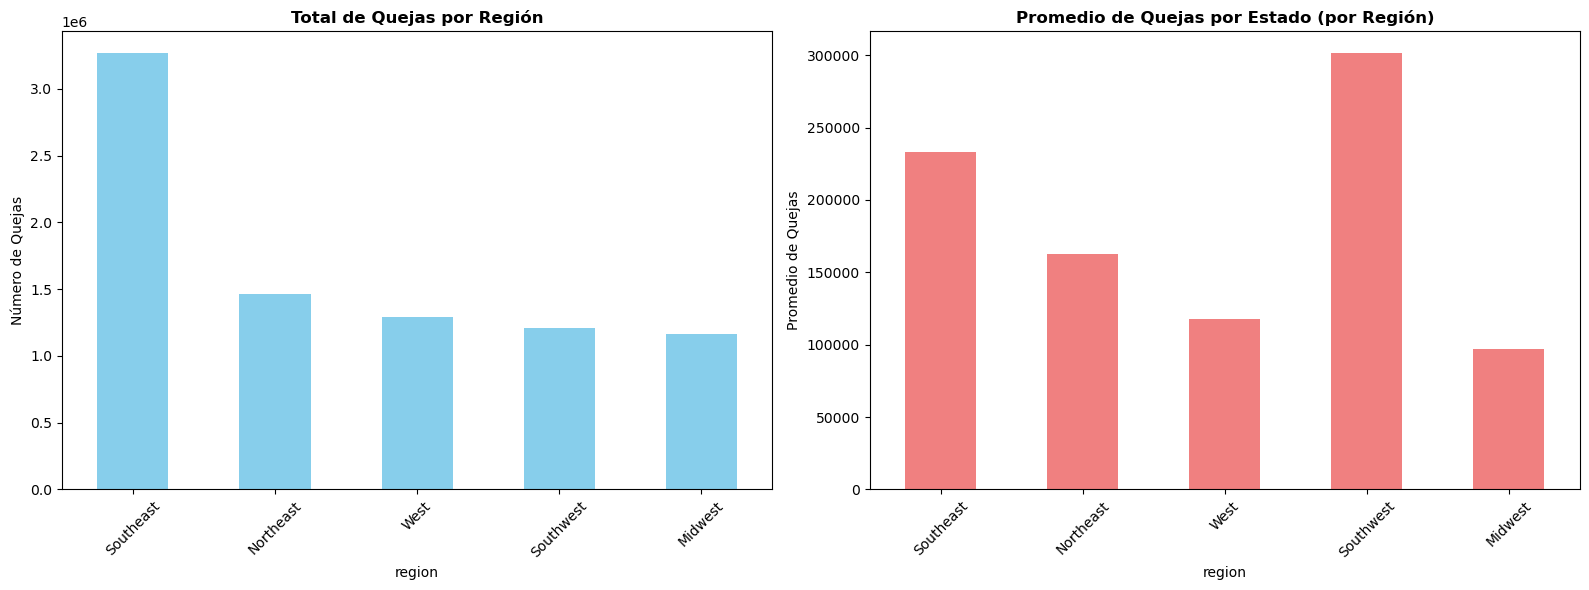

In [6]:
# Visualización regional
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

regional_analysis['Total_Quejas'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Total de Quejas por Región', fontweight='bold')
ax1.set_ylabel('Número de Quejas')
ax1.tick_params(axis='x', rotation=45)

regional_analysis['Promedio_por_Estado'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Promedio de Quejas por Estado (por Región)', fontweight='bold')
ax2.set_ylabel('Promedio de Quejas')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Estados con Mayor y Menor Actividad

In [7]:
# Estados extremos y estadísticas
top_5 = state_counts.head(5)
bottom_5 = state_counts.tail(5)

print("🔝 TOP 5 ESTADOS CON MÁS QUEJAS:")
for i, row in top_5.iterrows():
    print(f"{row['state']}: {row['num_quejas']:,} quejas")

print("\n🔻 TOP 5 ESTADOS CON MENOS QUEJAS:")
for i, row in bottom_5.iterrows():
    print(f"{row['state']}: {row['num_quejas']:,} quejas")

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"Media: {state_counts['num_quejas'].mean():.0f} quejas por estado")
print(f"Mediana: {state_counts['num_quejas'].median():.0f} quejas por estado")
print(f"Desviación estándar: {state_counts['num_quejas'].std():.0f}")
print(f"Coeficiente de variación: {(state_counts['num_quejas'].std()/state_counts['num_quejas'].mean())*100:.1f}%")

🔝 TOP 5 ESTADOS CON MÁS QUEJAS:
FL: 1,103,324 quejas
TX: 1,002,250 quejas
CA: 908,505 quejas
GA: 608,489 quejas
NY: 548,737 quejas

🔻 TOP 5 ESTADOS CON MENOS QUEJAS:
AK: 5,623 quejas
ND: 5,419 quejas
SD: 4,517 quejas
VT: 4,122 quejas
WY: 3,885 quejas

📈 ESTADÍSTICAS DESCRIPTIVAS:
Media: 167786 quejas por estado
Mediana: 70328 quejas por estado
Desviación estándar: 253040
Coeficiente de variación: 150.8%


## 5. Mapa Interactivo con Detalles

In [8]:
# Mapa interactivo con hover mejorado
fig = px.choropleth(
    state_counts,
    locations='state',
    color='num_quejas',
    hover_name='state',
    hover_data={'num_quejas': ':,'},
    locationmode='USA-states',
    scope='usa',
    color_continuous_scale='RdYlBu_r',
    title='Mapa Interactivo: Quejas de Consumidores por Estado'
)

fig.update_layout(title_x=0.5, width=1200, height=700)
fig.update_coloraxes(colorbar_title="Número de Quejas")

fig.show(config={
    'displaylogo': False,
    'modeBarButtonsToAdd': ['drawline', 'drawopenpath', 'drawcircle', 'drawrect', 'eraseshape'],
    'displayModeBar': True,
    'scrollZoom': True
})